# Test TSFresh

In [1]:
import os
import pandas as pd
import numpy as np

# Folder Opening and Data Organization

In [2]:
#From FFNN_v2

#Load and preprocess the data
folder_path = 'TDS_data_15000'
data = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None, squeeze = True)
            data[filename] = df1
            
# Combine all the data into a single dataframe
df = pd.concat(data.values())

# Drop NaN values
#df = df.dropna()

display(df)

C:\Users\mvigi\AppData\Local\Temp\ipykernel_22348\3160688949.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None, squeeze = True)
C:\Users\mvigi\AppData\Local\Temp\ipykernel_22348\3160688949.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None, squeeze = True)
C:\Users\mvigi\AppData\Local\Temp\ipykernel_22348\3160688949.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None,

des_flux  detrap_en  def_conc
0    0.000000e+00   1.075086  0.012055
1    5.431556e+14   1.090598  0.012796
2    8.071071e+14   1.280902  0.002110
3    1.184429e+15   1.363821  0.024988
4    1.713761e+15        NaN       NaN
..            ...        ...       ...
296 -1.219023e+11        NaN       NaN
297 -6.404793e+10        NaN       NaN
298  1.009435e+11        NaN       NaN
299  2.398936e+11        NaN       NaN
300 -1.387157e+11        NaN       NaN

[4310320 rows x 3 columns]

In [6]:
#Instead of shaping by 500, have to shape
#to create a design matrix in TSFresh

#Maybe turn this into a loop?
des_flux=df['des_flux']
des_flux=des_flux.tolist()
num_files=int(len(des_flux)/301)
des_flux=np.reshape(des_flux, [301, num_files])
#des_flux=pd.DataFrame(des_flux)
display(des_flux)
#print(type(des_flux[0]), des_flux.shape)

detrap_en=df['detrap_en']
detrap_en=detrap_en.dropna()
detrap_en=detrap_en.tolist()
num_files=int(len(detrap_en)/4)
detrap_en=np.reshape(detrap_en, [num_files, 4])
detrap_en_mean=detrap_en.mean(axis=1)
#detrap_en=np.reshape(detrap_en, [-1, 1])
detrap_en=pd.DataFrame(detrap_en)
detrap_en_mean=pd.DataFrame(detrap_en_mean)
display(detrap_en_mean)
#print(detrap_en, detrap_en.shape)

def_conc=df['def_conc']
def_conc=def_conc.dropna()
def_conc=def_conc.tolist()
num_files=int(len(def_conc)/4)
def_conc=np.reshape(def_conc, [num_files, 4])
def_conc_mean=def_conc.mean(axis=1)
#def_conc=np.reshape(def_conc, [-1, 1])
def_conc=pd.DataFrame(def_conc)
def_conc_mean=pd.DataFrame(def_conc_mean)
display(def_conc_mean)
#print(def_conc, def_conc.shape)

array([[ 0.00000000e+00,  5.43155589e+14,  8.07107134e+14, ...,
         2.07536174e+18,  1.82159216e+18,  1.57886013e+18],
       [ 1.34979978e+18,  1.13681751e+18,  9.41961021e+17, ...,
         4.86862323e+17,  5.34475925e+17,  5.85290707e+17],
       [ 6.39415743e+17,  6.96974997e+17,  7.58102760e+17, ...,
         1.40092013e+15,  8.38258859e+14,  4.79219871e+14],
       ...,
       [ 1.80892598e+18,  1.86013759e+18,  1.90898252e+18, ...,
         4.38505344e+11,  4.50023333e+11,  3.05075738e+11],
       [ 1.07988793e+11, -8.54734131e+10, -2.29671971e+11, ...,
         7.16306212e+18,  7.05095497e+18,  6.91916705e+18],
       [ 6.76842470e+18,  6.59988055e+18,  6.41517668e+18, ...,
         1.00943458e+11,  2.39893599e+11, -1.38715739e+11]])

0
0      1.202602
1      1.511330
2      1.514125
3      1.416363
4      1.580196
...         ...
14315  1.680269
14316  1.549573
14317  1.666555
14318  1.667560
14319  1.485595

[14320 rows x 1 columns]

0
0      0.012987
1      0.007481
2      0.011929
3      0.013044
4      0.014363
...         ...
14315  0.009622
14316  0.014900
14317  0.008761
14318  0.013426
14319  0.016066

[14320 rows x 1 columns]

# Preparation for Feature Extraction

In [7]:
#TSFresh is not reading in large values
#Like the raw TDS data. Normalize beforehand then
#do TSFresh

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
des_flux_norm = scaler.fit_transform(des_flux.reshape(-1, 1))

In [8]:
#make back into a 1d dataframe.
#Ask Anze whether it's best to normalize
#by complete dataset or by spectrum

des_flux_norm=pd.DataFrame(des_flux_norm)
display(des_flux_norm)

0
0       -0.835968
1       -0.835749
2       -0.835642
3       -0.835489
4       -0.835275
...           ...
4310315 -0.835968
4310316 -0.835968
4310317 -0.835968
4310318 -0.835968
4310319 -0.835968

[4310320 rows x 1 columns]

In [9]:
#Create an array counting 0 to 499,
#301 times for each count
#This marks the sequential data
#with an id used in TSFresh

des_flux_id = np.arange(0,des_flux_norm.shape[0])
des_flux_id = des_flux_id // 301

#Applies the id to the data
display(des_flux_id)
des_flux_norm["id"] = des_flux_id
display(des_flux_norm)

array([    0,     0,     0, ..., 14319, 14319, 14319], dtype=int32)

0     id
0       -0.835968      0
1       -0.835749      0
2       -0.835642      0
3       -0.835489      0
4       -0.835275      0
...           ...    ...
4310315 -0.835968  14319
4310316 -0.835968  14319
4310317 -0.835968  14319
4310318 -0.835968  14319
4310319 -0.835968  14319

[4310320 rows x 2 columns]

In [10]:
#Checking for proper shape
#and statistics

display(des_flux_norm.mean(), des_flux_norm.std(), des_flux_norm.min(), des_flux_norm.max())

0    -3.646281e-16
id    7.159500e+03
dtype: float64

0        1.000000
id    4133.828397
dtype: float64

0    -0.881076
id    0.000000
dtype: float64

0         7.020934
id    14319.000000
dtype: float64

# Feature Extraction and Selection

In [12]:
from tsfresh import extract_features
features = extract_features(des_flux_norm, column_id="id", column_sort="id")

Feature Extraction: 100%|██████████| 20/20 [24:29<00:00, 73.46s/it]  


In [13]:
#Display extracted features.
#Filtered features won't run with NaN values, 
#so drop 0__query_similarity_count__query_None__threshold_0.0 column

display(features)
list(features.columns)
features=features.drop(["0__query_similarity_count__query_None__threshold_0.0"], axis=1)
display(features)
features.to_csv('TDS_data_15000_features.csv', index=False)

0__variance_larger_than_standard_deviation  0__has_duplicate_max  \
0                                             1.0                   0.0   
1                                             0.0                   0.0   
2                                             1.0                   0.0   
3                                             0.0                   0.0   
4                                             1.0                   0.0   
...                                           ...                   ...   
14315                                         0.0                   0.0   
14316                                         0.0                   0.0   
14317                                         0.0                   0.0   
14318                                         0.0                   0.0   
14319                                         1.0                   0.0   

       0__has_duplicate_min  0__has_duplicate  0__sum_values  0__abs_energy  \
0                       0.0               0.0       8.735648     404.478889   
1                       0.0               0.0    -101.634218     113.496496   
2                       0.0               0.0     -12.450479     388.335547   
3                       0.0               0.0       9.898264     176.448761   
4                       0.0               0.0      36.370108     362.809424   
...                     ...               ...            ...            ...   
14315                   0.0               0.0     -58.691598     238.114054   
14316                   0.0               0.0      47.132614     170.993326   
14317                   0.0               0.0     -75.967702     108.451179   
14318                   0.0               0.0      17.578701     167.712031   
14319                   0.0               0.0      70.503927     346.425427   

       0__mean_abs_change  0__mean_change  0__mean_second_derivative_central  \
0                0.113179   -1.198495e-11                          -0.005245   
1                0.057317    8.447076e-13                          -0.002835   
2                0.152593    2.853019e-10                          -0.001927   
3                0.125782   -4.892377e-11                          -0.005591   
4                0.132758   -9.279060e-11                          -0.004360   
...                   ...             ...                                ...   
14315            0.083642    8.748013e-11                          -0.004510   
14316            0.133274    3.878459e-11                          -0.005946   
14317            0.102416   -9.249953e-10                          -0.002169   
14318            0.100224    3.018499e-10                          -0.004118   
14319            0.163200   -1.872168e-10                          -0.003469   

       0__median  ...  0__fourier_entropy__bins_5  \
0      -0.804733  ...                    0.200814   
1      -0.478246  ...                    0.090729   
2      -0.782230  ...                    0.155665   
3       0.097949  ...                    0.239211   
4      -0.530903  ...                    0.090729   
...          ...  ...                         ...   
14315  -0.692227  ...                    0.249958   
14316   0.172943  ...                    0.307703   
14317  -0.440265  ...                    0.262742   
14318   0.187076  ...                    0.200814   
14319  -0.021085  ...                    0.183378   

       0__fourier_entropy__bins_10  0__fourier_entropy__bins_100  \
0                         0.310337                      1.371395   
1                         0.170467                      1.098559   
2                         0.155665                      0.965696   
3                         0.359290                      1.339878   
4                         0.170467                      0.808030   
...                            ...                           ...   
14315                     0.370036                      0.984388   
14316          

0__variance_larger_than_standard_deviation  0__has_duplicate_max  \
0                                             1.0                   0.0   
1                                             0.0                   0.0   
2                                             1.0                   0.0   
3                                             0.0                   0.0   
4                                             1.0                   0.0   
...                                           ...                   ...   
14315                                         0.0                   0.0   
14316                                         0.0                   0.0   
14317                                         0.0                   0.0   
14318                                         0.0                   0.0   
14319                                         1.0                   0.0   

       0__has_duplicate_min  0__has_duplicate  0__sum_values  0__abs_energy  \
0                       0.0               0.0       8.735648     404.478889   
1                       0.0               0.0    -101.634218     113.496496   
2                       0.0               0.0     -12.450479     388.335547   
3                       0.0               0.0       9.898264     176.448761   
4                       0.0               0.0      36.370108     362.809424   
...                     ...               ...            ...            ...   
14315                   0.0               0.0     -58.691598     238.114054   
14316                   0.0               0.0      47.132614     170.993326   
14317                   0.0               0.0     -75.967702     108.451179   
14318                   0.0               0.0      17.578701     167.712031   
14319                   0.0               0.0      70.503927     346.425427   

       0__mean_abs_change  0__mean_change  0__mean_second_derivative_central  \
0                0.113179   -1.198495e-11                          -0.005245   
1                0.057317    8.447076e-13                          -0.002835   
2                0.152593    2.853019e-10                          -0.001927   
3                0.125782   -4.892377e-11                          -0.005591   
4                0.132758   -9.279060e-11                          -0.004360   
...                   ...             ...                                ...   
14315            0.083642    8.748013e-11                          -0.004510   
14316            0.133274    3.878459e-11                          -0.005946   
14317            0.102416   -9.249953e-10                          -0.002169   
14318            0.100224    3.018499e-10                          -0.004118   
14319            0.163200   -1.872168e-10                          -0.003469   

       0__median  ...  0__fourier_entropy__bins_3  0__fourier_entropy__bins_5  \
0      -0.804733  ...                    0.155665                    0.200814   
1      -0.478246  ...                    0.090729                    0.090729   
2      -0.782230  ...                    0.045395                    0.155665   
3       0.097949  ...                    0.159721                    0.239211   
4      -0.530903  ...                    0.090729                    0.090729   
...          ...  ...                         ...                         ...   
14315  -0.692227  ...                    0.183378                    0.249958   
14316   0.172943  ...                    0.247940                    0.307703   
14317  -0.440265  ...                    0.159721                    0.262742   
14318   0.187076  ...                    0.155665                    0.200814   
14319  -0.021085  ...                    0.125256                    0.183378   

       0__fourier_entropy__bins_10  0__fourier_entropy__bins_100  \
0                         0.310337                      1.371395   
1                         0.170467                      1.098559   
2                  

In [14]:
#Attempting to convert df to
#Series. Its multidimensional,
#may have to take the mean. 

type(detrap_en_mean)
detrap_en_mean = detrap_en_mean.squeeze()
display(detrap_en_mean)
type(detrap_en_mean)

type(def_conc_mean)
def_conc_mean = def_conc_mean.squeeze()
display(def_conc_mean)
type(def_conc_mean)

0        1.202602
1        1.511330
2        1.514125
3        1.416363
4        1.580196
           ...   
14315    1.680269
14316    1.549573
14317    1.666555
14318    1.667560
14319    1.485595
Name: 0, Length: 14320, dtype: float64

0        0.012987
1        0.007481
2        0.011929
3        0.013044
4        0.014363
           ...   
14315    0.009622
14316    0.014900
14317    0.008761
14318    0.013426
14319    0.016066
Name: 0, Length: 14320, dtype: float64

pandas.core.series.Series

In [15]:
#Where I'm currently stuck
#Calculating filtered features from the calculated
#extracted features. Only wants the output target as
#a Series. Choices: Convert def_conc and detrap_en
#into a Series by taking the mean of each row, 
#finding a workaround to allow for the target to 
#be a DataFrame, or find a similar module. 

from tsfresh import select_features, feature_selection
from tsfresh.feature_selection.relevance import calculate_relevance_table
detrap_en_relevance_table = calculate_relevance_table(features, detrap_en_mean, ml_task='regression')
def_conc_relevance_table = calculate_relevance_table(features, def_conc_mean, ml_task='regression')

In [16]:
detrap_en_relevance_table=pd.DataFrame(detrap_en_relevance_table)
display((detrap_en_relevance_table))
detrap_en_relevance_table=detrap_en_relevance_table.dropna()
detrap_en_relevance_table=detrap_en_relevance_table[detrap_en_relevance_table['relevant'] == True] 
detrap_en_relevance_table.sort_values("p_value", inplace=True)
display(detrap_en_relevance_table)
detrap_en_relevance_table.to_csv('TDS_data_15000_detrap_en_relevance_table.csv', index=False)

feature  \
feature                                                                                
0__fft_coefficient__attr_"imag"__coeff_31  0__fft_coefficient__attr_"imag"__coeff_31   
0__fft_coefficient__attr_"imag"__coeff_42  0__fft_coefficient__attr_"imag"__coeff_42   
0__fft_coefficient__attr_"imag"__coeff_41  0__fft_coefficient__attr_"imag"__coeff_41   
0__fft_coefficient__attr_"imag"__coeff_38  0__fft_coefficient__attr_"imag"__coeff_38   
0__fft_coefficient__attr_"imag"__coeff_37  0__fft_coefficient__attr_"imag"__coeff_37   
...                                                                              ...   
0__number_crossing_m__m_-1                                0__number_crossing_m__m_-1   
0__ratio_beyond_r_sigma__r_5                            0__ratio_beyond_r_sigma__r_5   
0__ratio_beyond_r_sigma__r_6                            0__ratio_beyond_r_sigma__r_6   
0__ratio_beyond_r_sigma__r_7                            0__ratio_beyond_r_sigma__r_7   
0__ratio_beyond_r_sigma__r_10                          0__ratio_beyond_r_sigma__r_10   

                                               type  p_value  relevant  
feature                                                                 
0__fft_coefficient__attr_"imag"__coeff_31      real      0.0      True  
0__fft_coefficient__attr_"imag"__coeff_42      real      0.0      True  
0__fft_coefficient__attr_"imag"__coeff_41      real      0.0      True  
0__fft_coefficient__attr_"imag"__coeff_38      real      0.0      True  
0__fft_coefficient__attr_"imag"__coeff_37      real      0.0      True  
...                                             ...      ...       ...  
0__number_crossing_m__m_-1                 constant      NaN     False  
0__ratio_beyond_r_sigma__r_5               constant      NaN     False  
0__ratio_beyond_r_sigma__r_6               constant      NaN     False  
0__ratio_beyond_r_sigma__r_7               constant      NaN     False  
0__ratio_beyond_r_sigma__r_10              constant      NaN     False  

[782 rows x 4 columns]

feature  \
feature                                                                                  
0__fft_coefficient__attr_"imag"__coeff_31    0__fft_coefficient__attr_"imag"__coeff_31   
0__fft_coefficient__attr_"angle"__coeff_94  0__fft_coefficient__attr_"angle"__coeff_94   
0__fft_coefficient__attr_"angle"__coeff_6    0__fft_coefficient__attr_"angle"__coeff_6   
0__fft_coefficient__attr_"angle"__coeff_13  0__fft_coefficient__attr_"angle"__coeff_13   
0__ratio_beyond_r_sigma__r_2                              0__ratio_beyond_r_sigma__r_2   
...                                                                                ...   
0__fft_coefficient__attr_"angle"__coeff_28  0__fft_coefficient__attr_"angle"__coeff_28   
0__fft_coefficient__attr_"real"__coeff_82    0__fft_coefficient__attr_"real"__coeff_82   
0__range_count__max_1__min_-1                            0__range_count__max_1__min_-1   
0__fft_coefficient__attr_"real"__coeff_28    0__fft_coefficient__attr_"real"__coeff_28   
0__ratio_beyond_r_sigma__r_0.5                          0__ratio_beyond_r_sigma__r_0.5   

                                            type   p_value  relevant  
feature                                                               
0__fft_coefficient__attr_"imag"__coeff_31   real  0.000000      True  
0__fft_coefficient__attr_"angle"__coeff_94  real  0.000000      True  
0__fft_coefficient__attr_"angle"__coeff_6   real  0.000000      True  
0__fft_coefficient__attr_"angle"__coeff_13  real  0.000000      True  
0__ratio_beyond_r_sigma__r_2                real  0.000000      True  
...                                          ...       ...       ...  
0__fft_coefficient__attr_"angle"__coeff_28  real  0.003177      True  
0__fft_coefficient__attr_"real"__coeff_82   real  0.003816      True  
0__range_count__max_1__min_-1               real  0.004867      True  
0__fft_coefficient__attr_"real"__coeff_28   real  0.005144      True  
0__ratio_beyond_r_sigma__r_0.5              real  0.006333      True  

[691 rows x 4 columns]

In [17]:
def_conc_relevance_table=pd.DataFrame(def_conc_relevance_table)
display((def_conc_relevance_table))
def_conc_relevance_table=def_conc_relevance_table.dropna()
def_conc_relevance_table=def_conc_relevance_table[def_conc_relevance_table['relevant'] == True] 
def_conc_relevance_table.sort_values("p_value", inplace=True)
display(def_conc_relevance_table)
def_conc_relevance_table.to_csv('TDS_data_15000_def_conc_relevance_table.csv', index=False)

feature  \
feature                                                                            
0__sum_values                                                      0__sum_values   
0__fft_coefficient__attr_"abs"__coeff_6  0__fft_coefficient__attr_"abs"__coeff_6   
0__fft_coefficient__attr_"abs"__coeff_5  0__fft_coefficient__attr_"abs"__coeff_5   
0__fft_coefficient__attr_"abs"__coeff_4  0__fft_coefficient__attr_"abs"__coeff_4   
0__fft_coefficient__attr_"abs"__coeff_3  0__fft_coefficient__attr_"abs"__coeff_3   
...                                                                          ...   
0__number_crossing_m__m_-1                            0__number_crossing_m__m_-1   
0__ratio_beyond_r_sigma__r_5                        0__ratio_beyond_r_sigma__r_5   
0__ratio_beyond_r_sigma__r_6                        0__ratio_beyond_r_sigma__r_6   
0__ratio_beyond_r_sigma__r_7                        0__ratio_beyond_r_sigma__r_7   
0__ratio_beyond_r_sigma__r_10                      0__ratio_beyond_r_sigma__r_10   

                                             type  p_value  relevant  
feature                                                               
0__sum_values                                real      0.0      True  
0__fft_coefficient__attr_"abs"__coeff_6      real      0.0      True  
0__fft_coefficient__attr_"abs"__coeff_5      real      0.0      True  
0__fft_coefficient__attr_"abs"__coeff_4      real      0.0      True  
0__fft_coefficient__attr_"abs"__coeff_3      real      0.0      True  
...                                           ...      ...       ...  
0__number_crossing_m__m_-1               constant      NaN     False  
0__ratio_beyond_r_sigma__r_5             constant      NaN     False  
0__ratio_beyond_r_sigma__r_6             constant      NaN     False  
0__ratio_beyond_r_sigma__r_7             constant      NaN     False  
0__ratio_beyond_r_sigma__r_10            constant      NaN     False  

[782 rows x 4 columns]

feature  \
feature                                                                                                 
0__sum_values                                                                           0__sum_values   
0__fft_coefficient__attr_"abs"__coeff_64                     0__fft_coefficient__attr_"abs"__coeff_64   
0__fft_coefficient__attr_"abs"__coeff_65                     0__fft_coefficient__attr_"abs"__coeff_65   
0__fft_coefficient__attr_"abs"__coeff_66                     0__fft_coefficient__attr_"abs"__coeff_66   
0__fft_coefficient__attr_"abs"__coeff_88                     0__fft_coefficient__attr_"abs"__coeff_88   
...                                                                                               ...   
0__agg_linear_trend__attr_"rvalue"__chunk_len_1...  0__agg_linear_trend__attr_"rvalue"__chunk_len_...   
0__fft_coefficient__attr_"real"__coeff_30                   0__fft_coefficient__attr_"real"__coeff_30   
0__fft_coefficient__attr_"angle"__coeff_61                 0__fft_coefficient__attr_"angle"__coeff_61   
0__agg_linear_trend__attr_"rvalue"__chunk_len_5...  0__agg_linear_trend__attr_"rvalue"__chunk_len_...   
0__fft_coefficient__attr_"angle"__coeff_86                 0__fft_coefficient__attr_"angle"__coeff_86   

                                                    type   p_value  relevant  
feature                                                                       
0__sum_values                                       real  0.000000      True  
0__fft_coefficient__attr_"abs"__coeff_64            real  0.000000      True  
0__fft_coefficient__attr_"abs"__coeff_65            real  0.000000      True  
0__fft_coefficient__attr_"abs"__coeff_66            real  0.000000      True  
0__fft_coefficient__attr_"abs"__coeff_88            real  0.000000      True  
...                                                  ...       ...       ...  
0__agg_linear_trend__attr_"rvalue"__chunk_len_1...  real  0.003037      True  
0__fft_coefficient__attr_"real"__coeff_30           real  0.003548      True  
0__fft_coefficient__attr_"angle"__coeff_61          real  0.003554      True  
0__agg_linear_trend__attr_"rvalue"__chunk_len_5...  real  0.004448      True  
0__fft_coefficient__attr_"angle"__coeff_86          real  0.005898      True  

[637 rows x 4 columns]

# Noise Addition

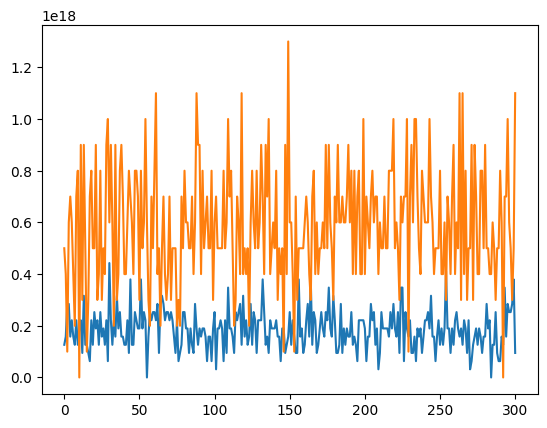

In [18]:
#Testing how to manipulate poisson noise
#np.random.poisson(lambda, k)
#lambda seems to modify amplitude
#k is the size you're applying it to (size of your data)

s = (np.random.poisson(6, 301)*10**(16.5))
s_2 = np.random.poisson(6, 301)*10**(17)
import matplotlib.pyplot as plt
#display(s)
plt.plot(s)
plt.plot(s_2)
plt.show()

C:\Users\mvigi\AppData\Local\Temp\ipykernel_22348\2943780703.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test_td = df["des_flux"][0:301]


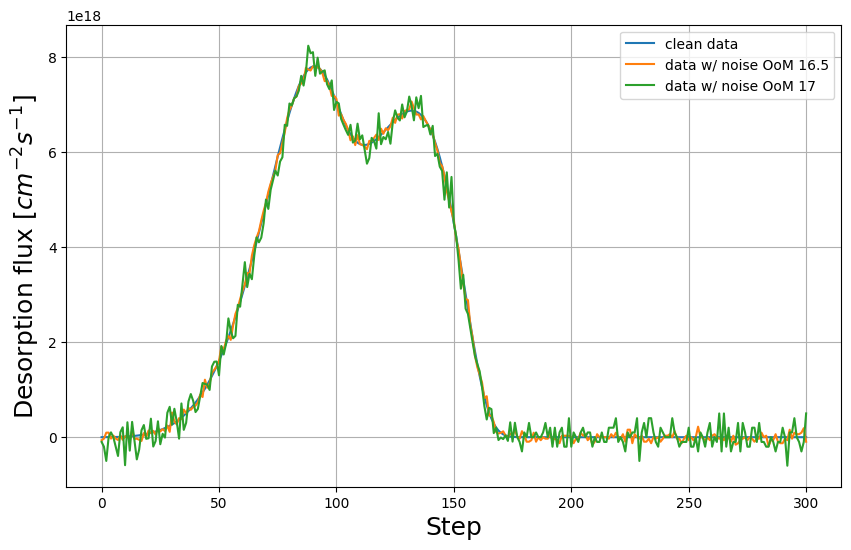

In [19]:
#Testing on a single TDS spectrum

test_td = df["des_flux"][0:301]
#display(test_td)
test_td=test_td.tolist()
#display(test_td)
test_td_wnoise=test_td+(s-np.median(s))
test_td_wnoise_2=test_td+(s_2-np.median(s_2))
plt.figure(figsize=(10,6))
plt.plot(test_td, label="clean data")
plt.plot(test_td_wnoise, label="data w/ noise OoM 16.5")
plt.plot(test_td_wnoise_2, label="data w/ noise OoM 17")
plt.xlabel("Step", fontsize=18)
plt.ylabel("Desorption flux [$cm^{-2}s^{-1}]$", fontsize=18)
plt.grid()
plt.legend()
plt.show()
